# Assignment template 2) Assessing cyclical dependency of fox and rabbit populations

This assignment follows on from 'Practical 5. Modules and Functions - Solving differential equations'. The main objective is:

<div class="alert alert-block alert-success">
<b> Plot the change in numbers of foxes as a function of rabbits for 6 different initial populations </b> 
  
Overview: You are tasked with:

 - 1. Looping through multiple starting numbers of foxes and rabbits.
 - 2. Plotting the number of foxes as a function of rabbits for these multiple conditions

Based on the example given in class, we can break this exercise down into a number of steps:

 - Defining the starting conditions we will cycle through
 - Initialise a matrix for foxe and rabbit numbers that will store the results of each simulation
 - Assign the result from each simulation as a specific variable. For example, this might be: rabbits1, foxes1, rabbits2, foxes2 etc.
 - Create a 2D plot of fox numbers as a function of rabbit
 
<div class="alert alert-block alert-warning">
<b>Please note:</b> 
    
As you are generating multiple outputs that represent the changing number of foxes and rabbits, you will need to plot each pair on the same graph. You can do this in Matplotlib by chaining together 'plot'commands. For example:

```python
plt.plot(rabbits, foxes, 'r-', label='0')
plt.plot(rabbits1, foxes1, 'b-', label='1')
plt.plot(rabbits2, foxes2, 'g-', label='2')
```
You can use the rest of the plotting commands from the class example. Aside from a working notebook we are also looking for the following:

 - An associated narrative with each operation. This includes the following sections:
 > Introduction and methdology
  - What is the challenge and how are you presenting it?
  - What modules/functions are you using?
 > Results
  - What is happening in each figure?
 > Referencing
  - What is the original source of the theory and/or data?
 - Comments in the code boxes using the # symbol
  - Remember that someone might not know what each line of code does.

You may also want to consider a broader discussion around this challenge. For example: 
 - What could be improved? 
 - How do you know your results are correct? [i.e. what might improve trust in your simulations?]
 - What if someone wanted to get in touch with you and re-use this code? Any restrictions on data?

To start, we reccomend you first get the code implementation working and then construct the narrative around it. Also please note that to add another code or markdown box, you can simple use the 'Insert' option on the main menu.

As a guide, your final figure plotting rabbits versus foxes should resemble the following:

<tr>
    <td> <img src="images/Assessment2_output.png" alt="Drawing" style="width: 400px;"/> </td>
</tr>
  
</div>

</div>

## Abstract

Differential equations define the physical laws of the Universe. However, beyond physics, we find their application in almost all areas of human knowledge. They can describe the interactions in a variety of systems; economic, social, natural, ... In this case, we will use them to describe the dynamics of predator-prey (foxes-rabbits) populations. Assuming a few simple laws, Lotka-Volterra equations, and given the initial sizes of populations, we can model the populations' behaviour and see their mutual dependency. It turns out that according to this model, populations' numbers will periodically oscillate, and the magnitude of oscillation will depend on the initial values.

## Introduction

### ODEs
Differential equations relate functions and their derivatives; we call them ordinary when they contain no partial derivatives. They come up whenever it is easier to describe the change than the absolute amounts. In the Predator-Prey problem, it is easier to say why population sizes increase or decrease than it is to determine their exact values.  Differential equations are extremely difficult to solve analytically; in some cases, it is impossible to find the precise analytical solution at all. However, when we are interested in the application of the differential equation, we often do not need the analytical solution and we can solve the equations numerically. Python provides us with tools for that. I used <code>scipy.integrate.odeint</code> solver which solves first-order differential equations. It is used for initial-boundary problems, where the equation and initial values are given. 

### Predator-Prey model
Predator-prey models are some of the basic building blocks of ecosystem understanding as species constantly compete and struggle for their existence.
The Lotka-Volterra equations provide us with arguably the most famous model of the population dynamics between two species, one of which is the predator and the other is the prey. The model describes the changes of populations with two coupled differential equations.

\begin{equation*}
\frac{dU}{dt} = aU - bUV \\
\frac{dV}{dt} = -cV + dbUV
\end{equation*}

$U$: rabbits\
$V$: foxes\
$a, b, c, d$: parameters describing the interactions between species

$a$: natural growth rate of rabbits when there's no fox\
$b$: dying rate due to predation by foxes\
$c$: is the natural death rate of fox when there's no rabbit\
$d$: factor describing how many caught rabbits lead to an increased population of foxes

The first equation describes how the rabbits' population change. The more rabbits in the population the more new rabbits are born (hence $+aU$). Some rabbits are eaten by foxes and this number depends both on the rabbits' and foxes' populations (hence $-bUV$). We assume an unlimited amount of food and space for rabbits, therefore there is no competition among them. The second equation is for the foxes' population. The more foxes, the bigger the competition between them (hence $-cV$). And the foxes thrive as they eat more rabbits (hence $+dbUV$). 

Given the initial sizes of populations, we can determine their changes in time using these equations. An important question would be, whether there are any conditions where the numbers of rabbits and foxes stay constant. It turns out, that there are two steady states.


The trivial case, where there are no foxes and no rabbits.\
\begin{equation*}
U = 0\\
V = 0
\end{equation*}
\
The second steady state.
\begin{equation*}
V = \frac{a}{b} \\
U = \frac{c}{db}
\end{equation*}
\
In the model, the values $a=1, b=0.1, c=1.5, d=0.75$ are used. With these values, we find a steady-state for $U=20, V=10$. If the populations' initial sizes are not in this state, they will change. It turns out, that they will periodically oscillate. If the numbers of foxes and rabbits are plotted on a plane against each other they will form a circular shape. This plane is called phase space and all the possible states of the system are represented there as these orbits. Their shape will vary according to the initial values, however, all of them will revolve around the steady-state point, in our case U, V = 20,10.


## Methodology

Firstly, I import the modules and prepare the initial values.

In [1]:
import numpy as np 
from scipy.integrate import odeint # importing the ODE solver odeint
import matplotlib.pyplot as plt

U0 = [22,30,50,90,1,2] #initial number of rabbits
V0 = [10,15,30,1,90,2] #initial number of foxes

for i in range(len(U0)): #printing the initial numbers for each scenario
    print("Scenario " + str(i) + ": " + str(U0[i]) + " rabbits, " + str(V0[i]) + " foxes")

Scenario 0: 22 rabbits, 10 foxes
Scenario 1: 30 rabbits, 15 foxes
Scenario 2: 50 rabbits, 30 foxes
Scenario 3: 90 rabbits, 1 foxes
Scenario 4: 1 rabbits, 90 foxes
Scenario 5: 2 rabbits, 2 foxes


The <code>model</code> represents the system of differential equations. It takes the variables U,V (functions are the variables in differential equations), time and the parameters as arguments. If there are two or more differential equations in the system, the variables must be passed as an array (or tuple). In our case y=(U,V). The model must return their <b>first derivatives</b>. 

In [2]:
def model(y,t,a,b,c,d):
    U = y[0]
    V = y[1] 
    dU_dt = a*U - b*U*V #the rate of change of rabbits
    dV_dt = -c*V + d*b*U*V #the rate of change of foxes
    return [dU_dt,dV_dt] #returns the 1st derivatives

t = np.linspace(0, 20, num=1000) #time span; one time step will be 20/1000 = 0.02; 1000 entries

Preparing two figures, using <code>plt.subplots</code>, that will display the results. On the first, the foxes are plotted against rabbits and on the second one, there is an evolution of the populations in time for each initial value.

When the figures are ready, I loop through all the initial values, solve the equations with <code>odeint</code> and plot the results. <code>odeint</code> has three required arguments: model, initial values.
and time sequence (in our case) for which to solve for y. We can pass the other parameters with as a tuple <code>args</code>.

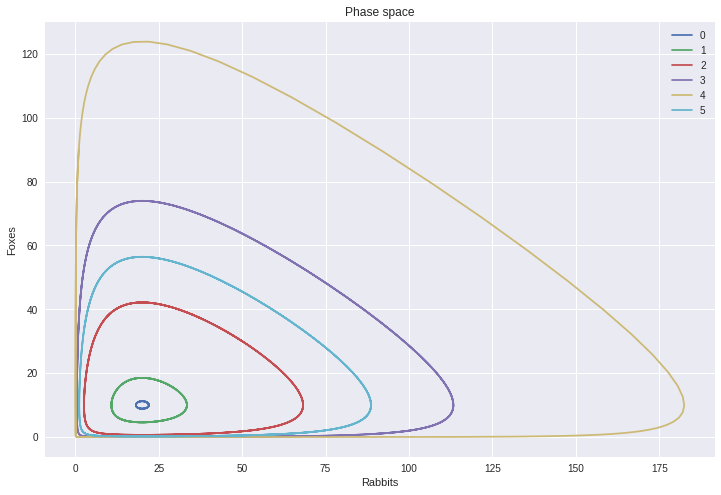

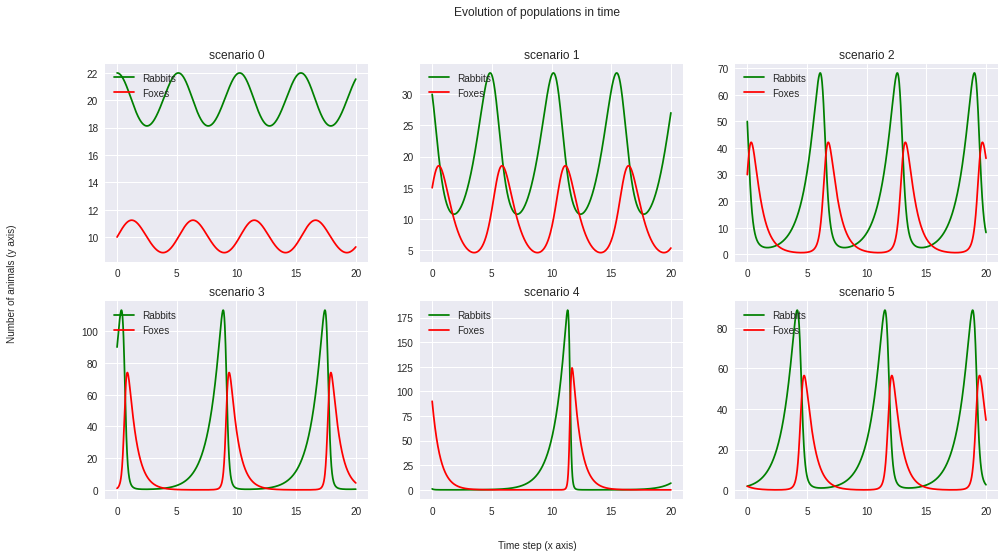

In [3]:
plt.style.use("seaborn") 
fig1, axs1 = plt.subplots(figsize=(12, 8)) #the first figure contains only 1 plot
axs1.set_xlabel("Rabbits")
axs1.set_ylabel("Foxes")
axs1.set_title("Phase space")

fig2,axs2 = plt.subplots(2,3, figsize=(16,8)) #the second figure contains six subplots
fig2.suptitle("Evolution of populations in time")
fig2.text(0.5, 0.04, 'Time step (x axis)', ha='center')
fig2.text(0.04, 0.5, 'Number of animals (y axis)', va='center', rotation='vertical')

for n in range(len(U0)): #loop through all initial values
    solution = odeint(model, (U0[n],V0[n]), t, args=(1,0.1,1.5,0.75)) #solution is an array of shape (1000,2) with values U and V for each time step
    rabbits = solution[:,0] #extracting the number of rabbits
    foxes = solution[:,1] #extracting the number of foxes
    axs1.plot(rabbits, foxes, label=n) #plotting the rabbits against the foxes
    axs1.legend(loc="best")
    axs2[n//3,n%3].plot(t,rabbits, "-g", label="Rabbits") #plotting the rabbits on one of the six subplots in fig2
    axs2[n//3,n%3].legend(loc="upper left")
    axs2[n//3,n%3].set_title("scenario " + str(n))
    axs2[n//3,n%3].plot(t,foxes, "-r", label="Foxes") #plotting the foxes on one of the six subplots in fig2
    axs2[n//3,n%3].legend(loc="upper left")

## Results

### Graphs
The graph <b>Phase space</b> shows the orbits in the phase space. They represent all the possible states of the system given the initial values. The six graphs <b>Evolution of populations in time</b> show the same data but plotted against the time steps. If the initial state is "closer" to the steady-state, the oscillations will have a smaller magnitude. The first three scenarios are realistic numbers, and the other three scenarios are three different extremes. In extreme scenarios, the changes are abrupt.

### Conclusion 

The equations capture the essence of the population dynamics. However, the model relies on unrealistic assumptions and is oversimplified. Some of these assumptions are:
1. It assumes unlimited resources for the prey; thus, infinite growth in the absence of a predator.
2. It does not consider any other animals that are part of the food chain, in this case only fox and rabbit.
3. The predators have an infinite appetite and can consume an infinite amount of prey. (due to the term UV)
4. The real-world ecosystem is a complex system that comprises many natural factors, that are changing.

There is a cyclical dependency of predator-prey populations in nature, though they cannot be modelled purely with the Lotka-Volterra model. Probably the most famous and closest real-world evidence comes from the Canadian Rocky Mountains, where lynxes' and hares' populations were monitored for over 90 years. They exhibit changes very similar to those predicted by the Lotka-Volterra model.

I also suppose that the oscillations predicted by the model are too extreme, as the species come very close to extinction in almost every scenario. Populations would hardly recover from such conditions. Furthermore, I assume that the model would work better for microorganisms in laboratory conditions, where the effects of other variables can be minimised.
Lastly, the mathematical model "is not aware" of working with rabbits and foxes, so it predicts population growth (reproduction) despite starting with just one fox and similar flaws.

#### References

1. Differential equations playlist: https://youtube.com/playlist?list=PLZHQObOWTQDNPOjrT6KVlfJuKtYTftqH6

2. Predator-prey video: https://www.youtube.com/watch?v=M0nRWcF1WJw&t=815s&ab_channel=Numberphile

3. Predator-prey evidence in nature: http://www.cds.caltech.edu/~murray/amwiki/index.php/Predator_prey

4. Another predator-prey models: http://www.scholarpedia.org/article/Predator-prey_model

5. The assignment guidance: https://github.com/loftytopping/DEES_programming_course

#### Reproducing the code

This code was written for the purpose of Computer Programming assignment, Environmental Sciences, University of Manchester. The code can be freely reused.
